In [19]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# 2.Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library? Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.

In [3]:
def plot_cluster(X, label, center, ax):
    K = np.amax(label) + 1
    color = ["b^", 'go', 'rx', 'mv', 'k+', 'c<']
    for i in range(K):
        X0 = X[label == i, :]
        ax.plot(X0[:, 0], X0[:, 1], color[i], markersize = 4, alpha = .6)
    if center is not None:
        for i in range(K):
            ax.plot(center[i][0], center[i][1], 'y*', markersize = 10, alpha = 1)
    ax.plot()

def draw_elbow_gmm(X, min_k = 2, max_k = 10):
    x_ax = []
    y_ax_aic = []
    y_ax_bic = []
    for i in range(min_k, max_k + 1):
        gmm = GaussianMixture(i)
        gmm.fit(X)
        x_ax.append(i)
        y_ax_aic.append(gmm.aic(X))
        y_ax_bic.append(gmm.bic(X))
    fig, ax = plt.subplots()
    ax.plot(x_ax, y_ax_aic, label = "aic")
    ax.plot(x_ax, y_ax_bic, label = "bic")
    ax.legend()
    ax.set_xlabel("number of clusters (K)")
    ax.set_title("elbow for gaussian mixture model")

def plot_silhoutte(X, K):
    fig, ax = plt.subplots()
    x = []
    y = []
    for i in range(2, K + 1):
        gmm = GaussianMixture(i)
        label_test = gmm.fit_predict(X)
        x.append(i)
        y.append(silhouette_score(X,  labels =  label_test))
    ax.scatter(x = x, y = y)
    ax.plot(x, y)
    ax.set_xlabel("number of clusters (K)")
    ax.set_ylabel("silhouette_score")  

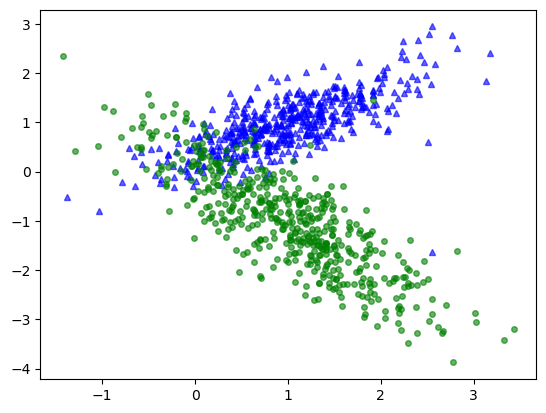

In [4]:
# toy dataset 1
X, y = make_classification(n_samples= 1000,
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class= 1
)
fig, ax = plt.subplots()
plot_cluster(X, y, center = None, ax = ax)

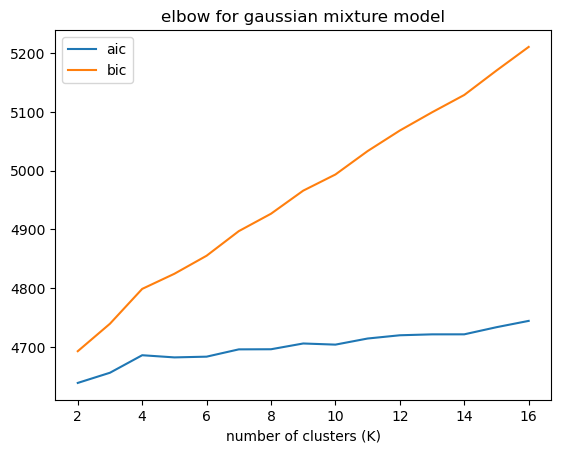

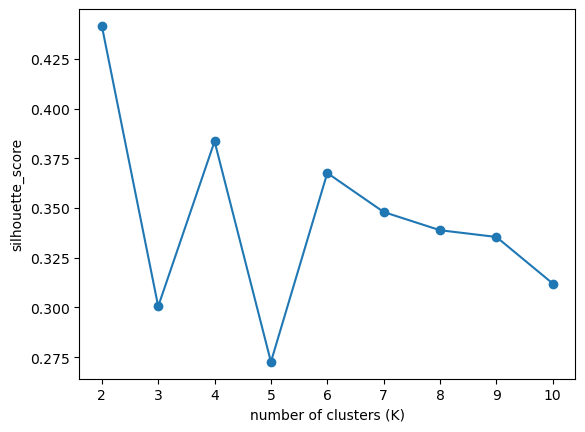

In [5]:
draw_elbow_gmm(X, 2, 16)
plot_silhoutte(X, 10)

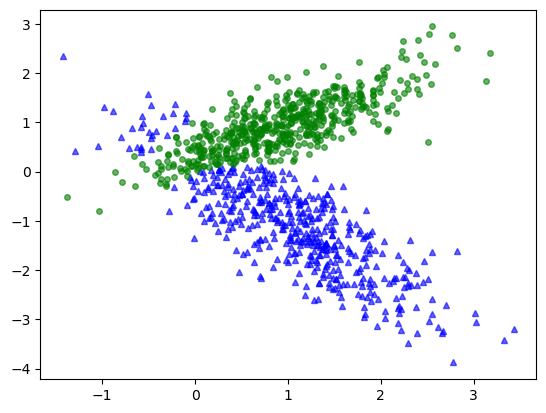

In [16]:
# Fitting gmm with 2 clusters
gmm = GaussianMixture(2)
gmm.fit(X)
fig, ax = plt.subplots()
plot_cluster(X, gmm.predict(X), center = None, ax = ax)

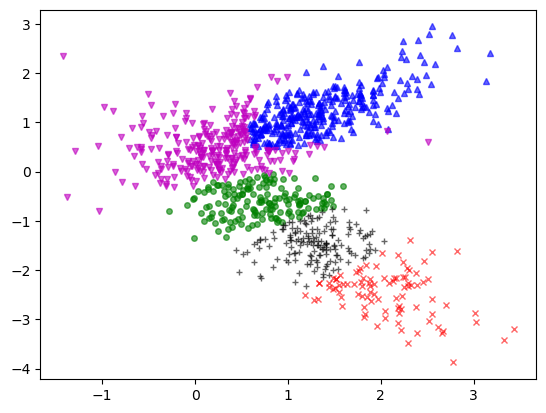

In [17]:
gmm = GaussianMixture(5)
gmm.fit(X)
fig, ax = plt.subplots()
plot_cluster(X, gmm.predict(X), center = None, ax = ax)

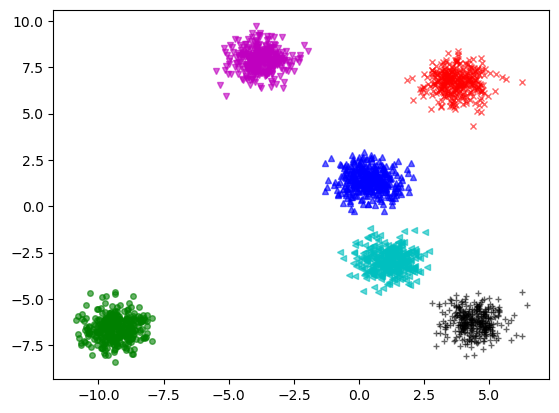

In [8]:
# toy dataset 2
x_train2, y_train2 = make_blobs(n_samples=2000, n_features=2, centers=6, random_state= 101, cluster_std=0.6)
fig, ax = plt.subplots()
plot_cluster(x_train2, label=y_train2, center = None, ax = ax)

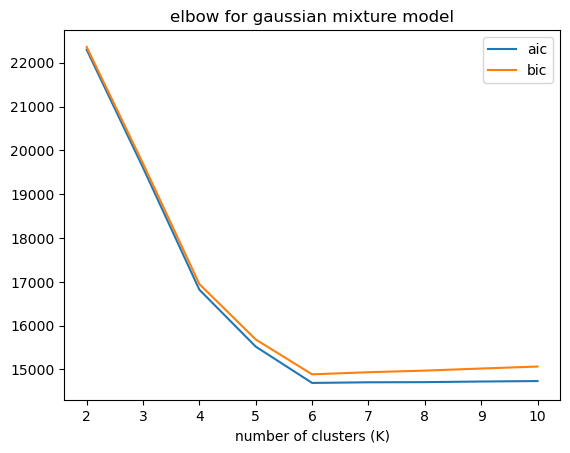

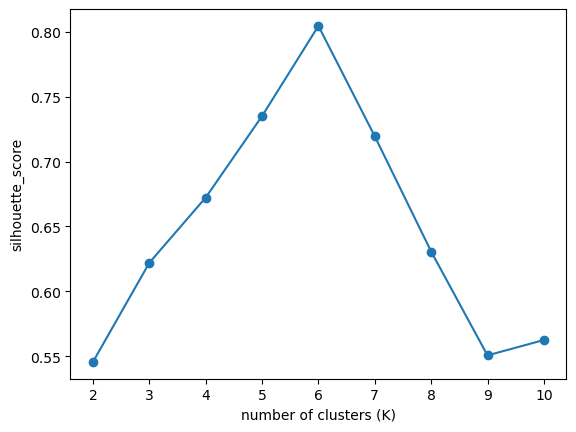

In [9]:
draw_elbow_gmm(x_train2)
plot_silhoutte(x_train2, 10)

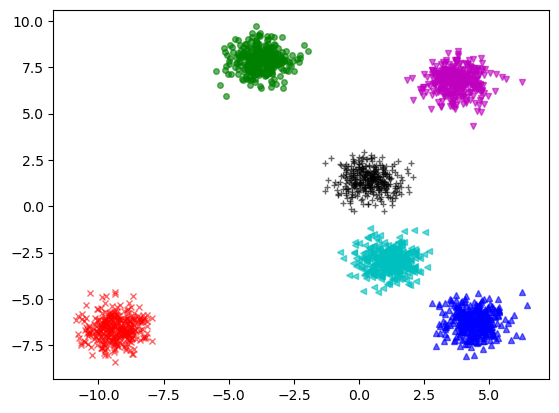

In [10]:
fig, ax = plt.subplots()
gmm2 = GaussianMixture(6)
y_pred = gmm2.fit_predict(x_train2)
plot_cluster(x_train2, label=y_pred, center = None, ax = ax)

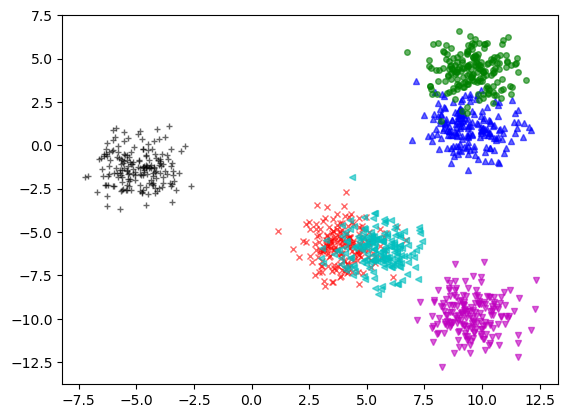

In [11]:
# toy dataset 3
fig, ax = plt.subplots()
x_train3, y_train3 = make_blobs(n_samples=1090, n_features=2, centers=6, random_state= 4)
plot_cluster(x_train3, label=y_train3, center = None, ax = ax)

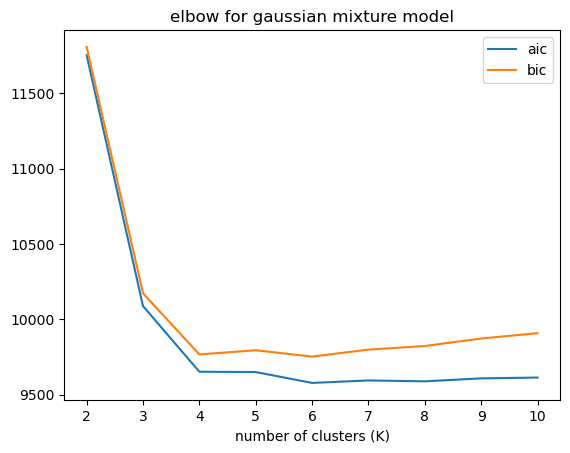

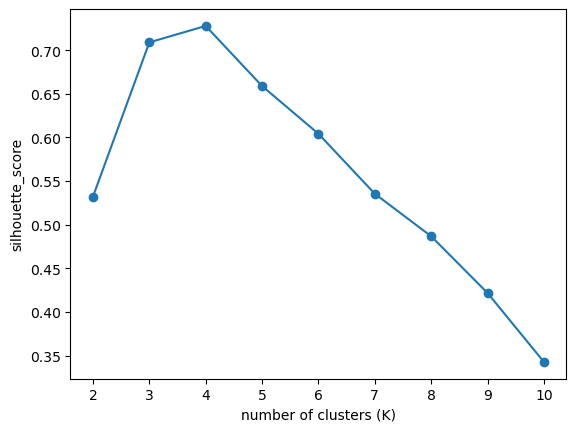

In [12]:
draw_elbow_gmm(x_train3)
plot_silhoutte(x_train3, 10)

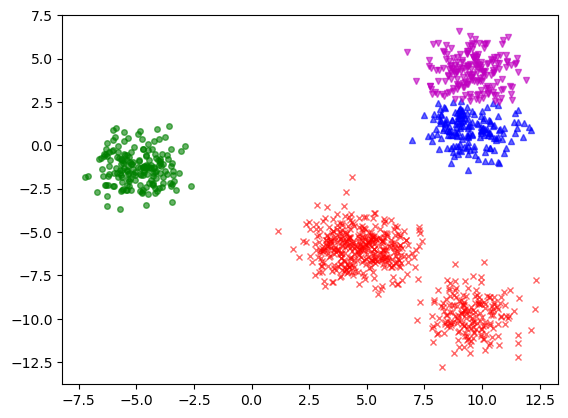

In [13]:
gmm3_4 = GaussianMixture(4)
fig, ax = plt.subplots()
plot_cluster(x_train3, label=gmm3_4.fit_predict(x_train3), center = None, ax = ax)

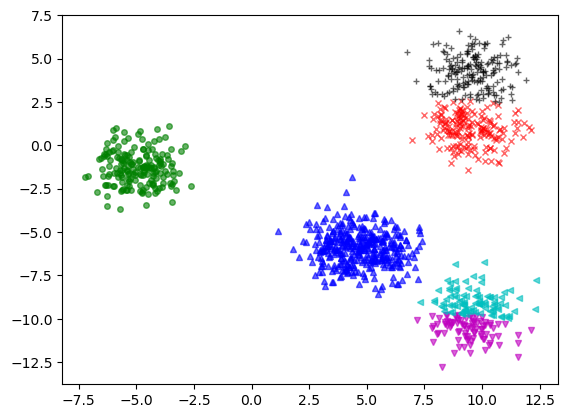

In [14]:
gmm3_6 = GaussianMixture(6)
fig, ax = plt.subplots()
plot_cluster(x_train3, label=gmm3_6.fit_predict(x_train3), center = None, ax = ax)

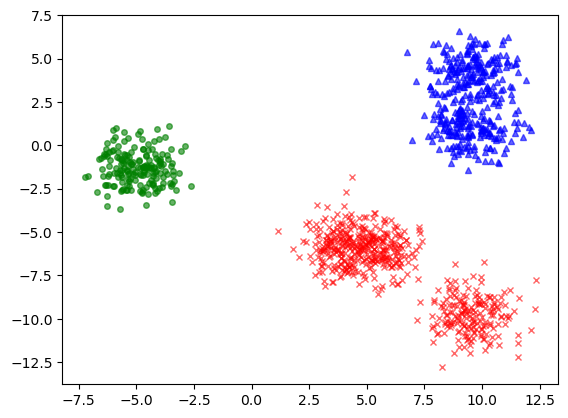

In [15]:
gmm3_3 = GaussianMixture(3)
fig, ax = plt.subplots()
plot_cluster(x_train3, label=gmm3_3.fit_predict(x_train3), center = None, ax = ax)

In [20]:
X, y = make_circles(
    n_samples=1000, factor=0.5, noise=0.05, random_state=0
)

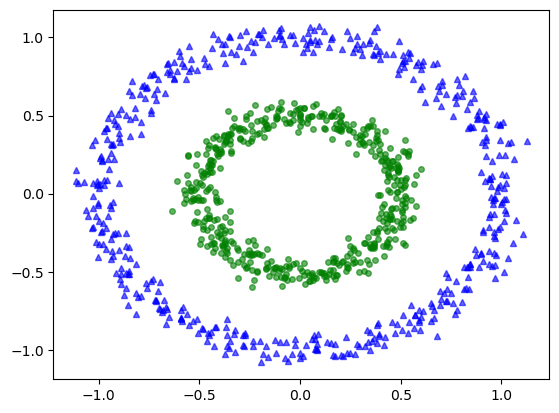

In [21]:
fig, ax = plt.subplots()
plot_cluster(X, y, center=None, ax = ax)

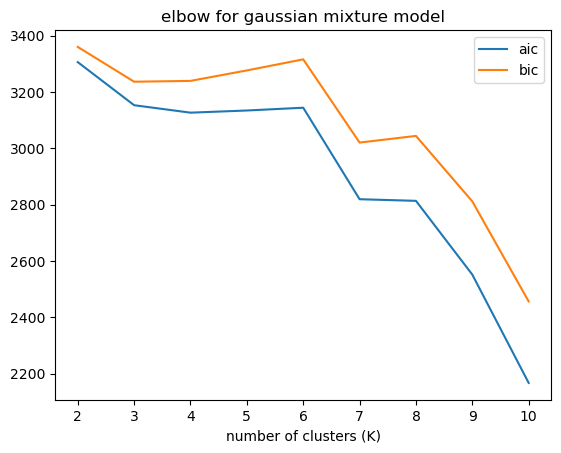

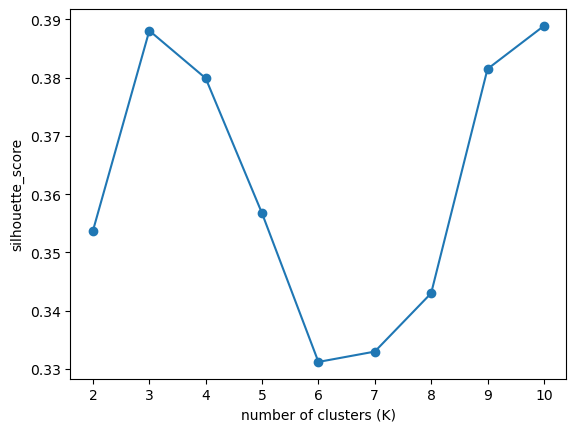

In [23]:
draw_elbow_gmm(X)
plot_silhoutte(X, 10)

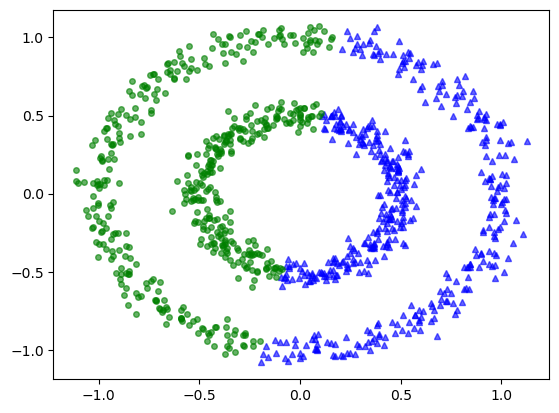

In [25]:
fig, ax = plt.subplots()
gmm = GaussianMixture(2)
plot_cluster(X, gmm.fit_predict(X), center=None, ax = ax)